## Observations and Insights 

In [32]:
# Format the visualizations
# Clean up the code
# Finalize ReadMe
# Share with friends

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# File paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results,on=["Mouse ID"])

# Display merged data table
mouse_study_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Mean
mean_volume = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# Median
median_volume = mouse_study_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# Variance 
var_volume = mouse_study_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

# Standard Deviation 
std_volume = mouse_study_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]


# Create a summary dataframe
complete_volume_df = pd.DataFrame({"Mean": mean_volume,
                              "Median": median_volume,
                              "Variance": var_volume,
                              "Standard Deviation": std_volume})

complete_volume_df


,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and of the tumor volume for each regimen sing the aggregation method.
aggregations = { "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std'] 
}
sum_statistics = mouse_study_complete.groupby(["Drug Regimen"]).agg(aggregations)
sum_statistics


Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  4.994774
Ceftamin              52.591172  51.776157  39.290177  6.268188
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.322552  50.854632  42.351070  6.507770
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.236507  51.818479  48.533355  6.966589

## Bar and Pie Charts

In [36]:
# Create a dataframe grouped by drug regimen and Sum Timepoint row
drug_regimen = mouse_study_complete.groupby("Drug Regimen").sum("Timepoint")
drug_regimen



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,3095,4592,4960,9355.420462,164
Ceftamin,2358,4877,3515,9361.228582,210
Infubinol,2889,4841,3235,9413.493529,171
Ketapril,2944,5238,3705,10384.299876,244
Naftisol,2232,5053,3650,10105.671026,220
Placebo,1943,5055,3380,9780.078122,261
Propriva,1754,4354,2715,8423.930878,157
Ramicane,2436,4487,4885,9169.417875,125
Stelasyn,2314,5042,3480,9816.199991,158


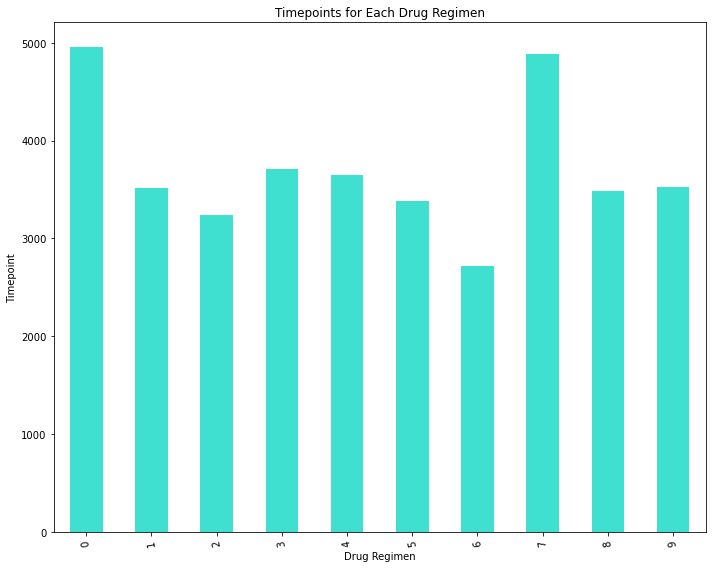

In [44]:
# Somehow deleted the names being used as the labels here instead of the index #. Try to get that back.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas built-in plotting functions 
count_chart = drug_regimen["Timepoint"].plot(kind='bar', figsize=(10,8), color="turquoise")

# Set the xlabel and ylabel
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoint")
count_chart.set_title("Timepoints for Each Drug Regimen")

# Rotate X axis
plt.xticks(rotation=100) 

# Show chart
plt.tight_layout()
plt.show()

In [38]:
# Reset drug_regemin index - needed for using matplotlib functions below
drug_regimen.reset_index(inplace=True) 
drug_regimen

,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,3095,4592,4960,9355.420462,164
1,Ceftamin,2358,4877,3515,9361.228582,210
2,Infubinol,2889,4841,3235,9413.493529,171
3,Ketapril,2944,5238,3705,10384.299876,244
4,Naftisol,2232,5053,3650,10105.671026,220
5,Placebo,1943,5055,3380,9780.078122,261
6,Propriva,1754,4354,2715,8423.930878,157
7,Ramicane,2436,4487,4885,9169.417875,125
8,Stelasyn,2314,5042,3480,9816.199991,158
9,Zoniferol,2293,5040,3525,9689.044192,224


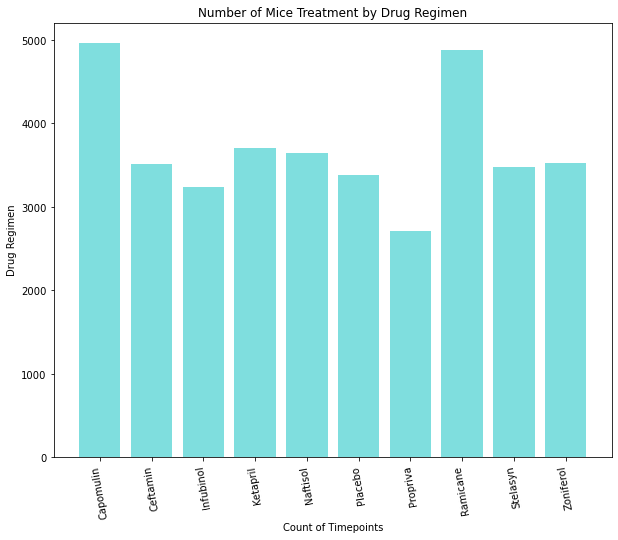

In [39]:
# Generate a bar chart using matplotlib functions 
timepoint=drug_regimen["Timepoint"]
x_axis =drug_regimen["Drug Regimen"]
plt.figure(figsize=(10, 8))
plt.bar(x_axis, timepoint, color='c', alpha=0.5, align="center")

# Show chart 
plt.title("Number of Mice Treatment by Drug Regimen")
plt.xlabel("Count of Timepoints")
plt.ylabel("Drug Regimen")

# Rotate X axis
xticks = plt.xticks(rotation=100) 

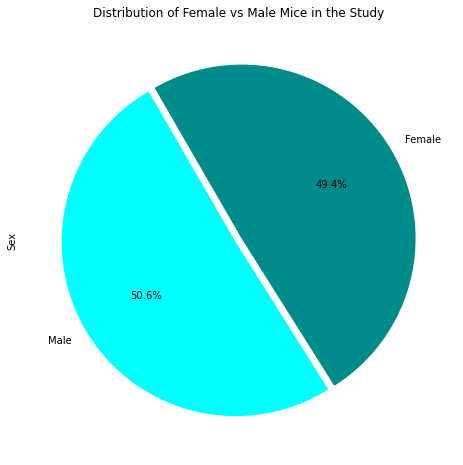

In [51]:
# How to remove the "sex" label on the side of this chart? 
# Change the startangle to match the chart below

# Generate a pie plot showing the distribution of female versus male mice using Pandas built-in plotting function 

# Use the 'Value' column as the data to represent in the pie chart
s_counts = mouse_study_complete['Sex'].value_counts()

# Set colors
colors = ['#00FFFF','#008B8B']

#Using Pandas plotting function
s_counts.plot.pie(subplots=True, figsize=(10, 8), colors = colors, autopct='%1.1f%%', explode=[0.02, 0.02],startangle=120);
plt.title('Distribution of Female vs Male Mice in the Study')
fig = plt.gcf()
fig.patch.set_facecolor('white')

# Show plot 
plt.show()


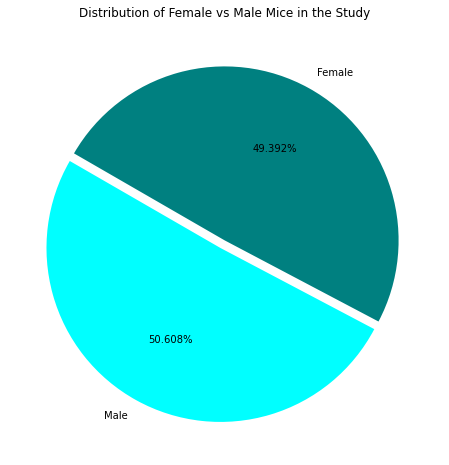

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib 

# Set values
values = mouse_study_complete.value_counts("Sex")
labels= ["Male", "Female"]
colors = ["cyan", "teal"]
explode = (0.05,0)

# Set figure size
fig = plt.figure(figsize=(10, 8), facecolor='white')

# Create pie chart 
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.3f%%", startangle=150)

# Set title 
plt.title('Distribution of Female vs Male Mice in the Study')

# Show chart
plt.show()
 

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#Group by drug regimen 
adjusted_mouse_data = clean_df.groupby("Mouse ID")["Timepoint"].max()

#Rename this dataframe
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grouped_mouse_data = pd.merge(clean_df,adjusted_mouse_data,on=["Mouse ID"])

#Reset the index 
setting_index = grouped_mouse_data.set_index("Drug Regimen")
setting_index


NameError: name 'clean_df' is not defined

In [ ]:
grouped_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,NaN,21,16,5,38.825898,0,45
2,k403,Ramicane,NaN,21,16,10,35.014271,1,45
3,k403,Ramicane,NaN,21,16,15,34.223992,1,45
4,k403,Ramicane,NaN,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,NaN,9,30,25,63.145652,2,45
1889,z969,Naftisol,NaN,9,30,30,65.841013,3,45
1890,z969,Naftisol,NaN,9,30,35,69.176246,4,45
1891,z969,Naftisol,NaN,9,30,40,70.314904,4,45


In [ ]:
#This need to be cleaned and I should write about this code in the ReadMe

# Put treatments into a list
four_treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#for loop 
for treatment in four_treatments: 
    each_treatment = grouped_mouse_data.loc[grouped_mouse_data["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]

    tumor_vol_data.append(each_treatment)

    # Calculate the IQR
    quartiles= each_treatment.quantile([0.25,0.5,0.75])
    lowerq = quartiles[.25]
    upperq = quartiles[0.75]
    iqr = lowerq-upperq

# Did this print for each 4 groups?  If so, should that be laid out here. 
    print(f"The lower quartile of tumor vol data is: {lowerq}")
    print(f"The upper quartile of tumor vol data is: {upperq}")
    print(f"The interquartile range of tumor vol data is: {iqr}")
    print(f"The the median of tumor vol data is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor vol data is: 37.685932865
The upper quartile of tumor vol data is: 45.0
The interquartile range of tumor vol data is: -7.314067135000002
The the median of tumor vol data is: 41.557808879999996 
Values below 48.6570335675 could be outliers.
Values above 34.0288992975 could be outliers.
The lower quartile of tumor vol data is: 36.674634585
The upper quartile of tumor vol data is: 45.0
The interquartile range of tumor vol data is: -8.325365415
The the median of tumor vol data is: 40.67323554 
Values below 49.1626827075 could be outliers.
Values above 32.511951877499996 could be outliers.
The lower quartile of tumor vol data is: 47.3123533
The upper quartile of tumor vol data is: 57.314443967500004
The interquartile range of tumor vol data is: -10.002090667500006
The the median of tumor vol data is: 51.82058438 
Values below 62.31548930125001 could be outliers.
Values above 42.31130796625 could be outliers.
The lower quartile of tumor vol data is: 47.2084271125


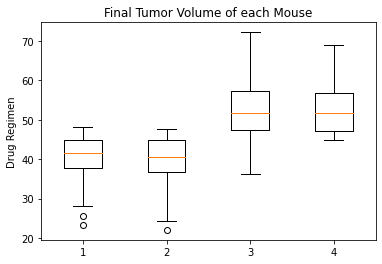

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Each mouse: I'm not sure what this plot is showing? There is no X lable on this chart
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(tumor_vol_data)

#Change size of the chart 

#Change the color of the boxes
# boxplot = ax1.boxplot(tumor_vol_data, boxprops={'color': 'cyan'})

plt.show()

## Line and Scatter Plots

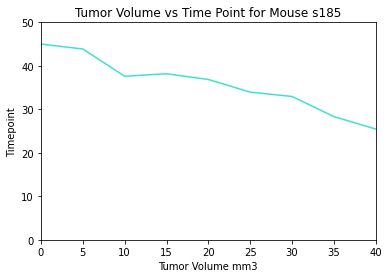

In [ ]:
#The duplicates dropped isn't working because the duplicates dropped dataframe turned timepoint to zero... I changed to to mousestudycomplete

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = clean_df.loc[mouse_study_complete["Drug Regimen"]== "Capomulin"]
mouse_treatment = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]== "s185"]
# capomulin_treatment["Mouse ID"].value_counts()
capomulin_treatment

plt.plot(mouse_treatment["Timepoint"], mouse_treatment["Tumor Volume (mm3)"], color='turquoise')
plt.xlabel("Tumor Volume mm3")
plt.ylabel("Timepoint")
plt.xlim([0,40])
plt.ylim([0,50])
#Rename about what this chart is actually showing
plt.title("Tumor Volume vs Time Point for Mouse s185")
plt.show()

#Change size of the chart


In [ ]:
#Testing it with another df

# plt.plot(drug_regimen["Weight (g)"], drug_regimen["Timepoint"])
# plt.xlabel("Tumor Volume mm3")
# plt.ylabel("Weight(g)")
# plt.xlim([0,50])
# plt.ylim([40,50])
# plt.show()

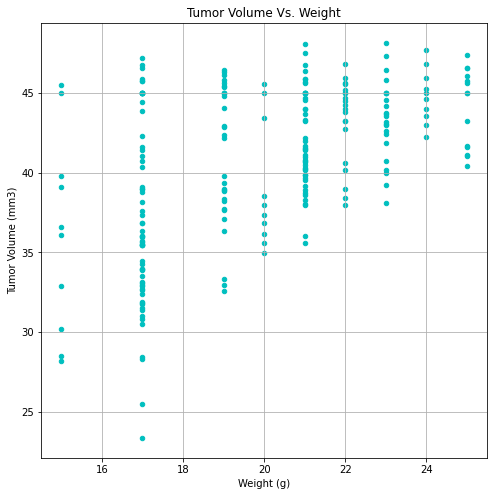

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = grouped_mouse_data.loc[grouped_mouse_data["Drug Regimen"]== "Capomulin"]
capomulin_average = capomulin_treatment.groupby(["Mouse ID"]).mean()

capomulin_treatment.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Tumor Volume Vs. Weight", color='c')
plt.show()

#Change size of the chart


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# code from help with class
# income = mouse_study_complete.iloc[:,1]
# measles = mouse_study_complete.iloc[:,12]
# correlation = st.pearsonr(income,measles)
# plt.scatter(income,measles)
# plt.xlabel('Income Per Capita')
# plt.ylabel('% Measles Immunization')
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()

#correlation coefficient 

correlation = capomulin_average["Tumor Volume (mm3)"].corr(capomulin_average["Weight (g)"], method="pearson")
print(f"The correlation between both factors is {correlation}")



The correlation between both factors is 0.841936342469472


Linear regression equation: y = 0.96x + 21.49


<function matplotlib.pyplot.show(close=None, block=None)>

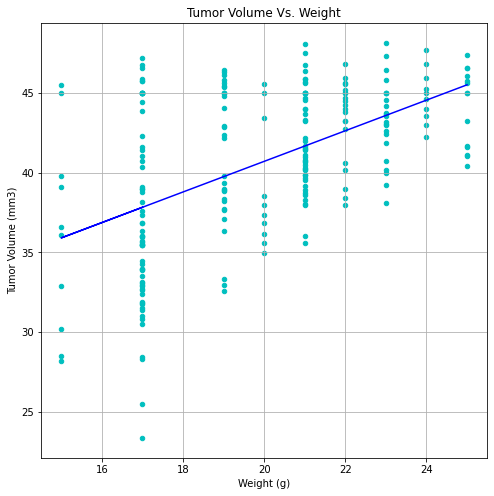

In [ ]:
capomulin_treatment.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Tumor Volume Vs. Weight", color='c')

# model = np.polyfit(x, y, 1)
# linregress(capomulin_treatment["Weight (g)"],capomulin_treatment["Tumor Volume (mm3)"])

x_values=capomulin_treatment['Weight (g)']
y_values=capomulin_treatment['Tumor Volume (mm3)']
(slope, intercept,  rvalue, pvalue, stderr)=st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,'blue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Linear regression equation: {line_eq}')
plt.show

